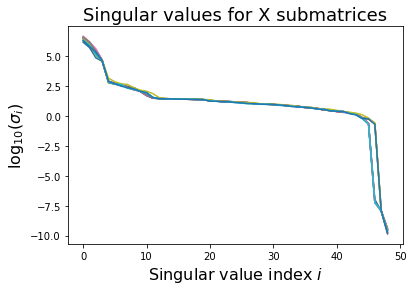

From plot, almost universal drop-offs at SV = 3 and 10
0
1
2
3
4
5
6
7
8
9
10
Mean y values for 3 rank approx:
 [[ 2983.60232058]
 [ 4286.37180713]
 [10333.34623444]]
Mean y values for 10 rank approx:
 [[ 2194.24748068]
 [ 2714.92589141]
 [ 3009.81266828]
 [ 3404.77496015]
 [ 3809.46949194]
 [ 4225.54622167]
 [ 4799.8818587 ]
 [ 5570.03475467]
 [ 6589.91866683]
 [10931.21302219]]


In [1]:
import numpy as np
from scipy.io import loadmat
from scipy.io import savemat
import matplotlib.pyplot as plt 

def kMeans(X, K, maxIters = 20, plot_progress = None):

    centroids = X[np.random.choice(len(X), K)]
    for i in range(maxIters):
        #print(i)
        # Cluster Assignment step
        C = np.array([np.argmin([(x_i-y_k)@(x_i-y_k) for y_k in centroids]) for x_i in X])
        # Update centroids step 
        centroids = []
        for k in range(K):
            if (C == k).any():
                centroids.append( X[C == k].mean(axis = 0) )
            else: # if there are no data points assigned to this certain centroid
                centroids.append( X[np.random.choice(len(X))] )
        if plot_progress != None: plot_progress(X, C, np.array(centroids))
    return np.array(centroids) , C

#################################################################
#SETUP
X = loadmat("RawData.mat")['X']
y = loadmat("RawData.mat")['y']
Xones = np.ones((len(X),1))

TwoNormCol = np.zeros((len(X.T),1))

#Remove keyword columns (poorly treated data)
X = np.delete(X, 17, 1)
X = np.delete(X, 17, 1)
X = np.delete(X, 17, 1)
X = np.delete(X, 17, 1)
X = np.delete(X, 17, 1)
X = np.delete(X, 17, 1)
X = np.delete(X, 17, 1)
X = np.delete(X, 17, 1)
X = np.delete(X, 17, 1)

#Normalize columns to 2-norm
for i in range(len(X.T)):
    TwoNormCol[i] = np.sqrt(X[i,:]@X[i,:])
    X[i,:] = X[i,:]/TwoNormCol[i]
#print(TwoNormCol)
#print(X[0,:])
#print(y)
    
#Form subsets (indices, first group is full X)
Xsubs = np.array([[0,49],[0,5],[5,7],[7,9],[9,11],[11,17],[17,20],[20,26],[28,33],[33,37],[37,45],[45,49]])

#Create and run over 11 sets of 3604 entries from X and y,
#using 1 as a primary test set (when needed for lambda)
setArr = np.array([[0,int(len(X)/11)],[int(len(X)/11),int(2*len(X)/11)],[int(2*len(X)/11),int(3*len(X)/11)],\
                   [int(3*len(X)/11),int(4*len(X)/11)],[int(4*len(X)/11),int(5*len(X)/11)],\
                   [int(5*len(X)/11),int(6*len(X)/11)],[int(6*len(X)/11),int(7*len(X)/11)],\
                   [int(7*len(X)/11),int(8*len(X)/11)],[int(8*len(X)/11),int(9*len(X)/11)],\
                   [int(9*len(X)/11),int(10*len(X)/11)],[int(10*len(X)/11),int(len(X))]])
#print(setArr)


#Error tally storage
errorOrig = 0

XdifMin = np.zeros((11,1))
XdifVal = np.zeros((11,1))

################################

#Only testing full X set
#for Xset in range(1):

sMatrix = np.zeros((11,len(X.T)))

Xset = 0
tal = 0
for i in range(11):
    testTally = 0
    for k in range(11):
        if i == k:
            XTest1 = X[setArr[i,0]:setArr[i,1],Xsubs[Xset,0]:Xsubs[Xset,1]]
            yTest1 = y[setArr[i,0]:setArr[i,1]]
             
    U,s,VT = np.linalg.svd(XTest1,full_matrices=False)

    sMatrix[tal,:] = s
            
    tal = tal + 1
            
            
#print(sMatrix)           
            
#Plot of Singular Values for Submatrices (11 subsets of full X)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.log10(sMatrix[:,:].T))
ax.set_xlabel('Singular value index $i$', fontsize=16)
ax.set_ylabel('$\log_{10}(\sigma_i)$', fontsize=16)
ax.set_title('Singular values for X submatrices', fontsize=18)
plt.show()

print("From plot, almost universal drop-offs at SV = 3 and 10")


Xset = 0
tal = 0

y3sum = np.zeros((3,1))
y10sum = np.zeros((10,1))

for i in range(11):
    testTally = 0
    for k in range(11):
        if i == k:
            XTest1 = X[setArr[i,0]:setArr[i,1],Xsubs[Xset,0]:Xsubs[Xset,1]]
            yTest1 = y[setArr[i,0]:setArr[i,1]]
    
    rows, cols = np.shape(XTest1)
    
    centroids3, C3 = kMeans(XTest1, 3)
    centroids10, C10 = kMeans(XTest1, 10)
    #print(C3.T)
    
    tally3 = np.zeros((3,1))
    y3 = np.zeros((3,1))
    
    #Process rank 3
    for j in range(3):
        #print(j)
        for k in range(len(yTest1)):
            if (j == C3[k]):
                tally3[j] = tally3[j] + 1
                y3[j] = y3[j] + yTest1[k]
    
    y3 = y3/tally3
    
    #sort
    y3 = sorted(y3)

    #print(y3)  
    y3sum = y3sum + y3
    
    #print(y3sum)
    
    tally10 = np.zeros((10,1))
    y10 = np.zeros((10,1))
    
    #Process rank 10
    for j in range(10):
        #print(j)
        for k in range(len(yTest1)):
            if (j == C10[k]):
                tally10[j] = tally10[j] + 1
                y10[j] = y10[j] + yTest1[k]
    
    y10 = y10/tally10
    
    #sort
    y10 = sorted(y10)

    #print(y10)  
    y10sum = y10sum + y10
    
    #print(y10sum) 
    
    print(i)
    
y3Mean = y3sum/11
y10Mean = y10sum/11

print("Mean y values for 3 rank approx:\n",y3Mean)
print("Mean y values for 10 rank approx:\n",y10Mean)

In [2]:
totalMatch3Sum = 0
totalMatch10Sum = 0

for i in range(11):
    print("i = ",i)
    testTally = 0
    #Set up Training and testing sets
    for k in range(11):
        if i == k:
            XTest1 = X[setArr[i,0]:setArr[i,1],Xsubs[Xset,0]:Xsubs[Xset,1]]
            #print(XTest1)
            yTest1 = y[setArr[i,0]:setArr[i,1]]
            #print(yTest1)
        if k != i:
            if testTally == 0:
                XTrain = X[setArr[k,0]:setArr[k,1],Xsubs[Xset,0]:Xsubs[Xset,1]]
                yTrain = y[setArr[k,0]:setArr[k,1]]
                testTally = 1
            else:
                XTrain = np.concatenate((XTrain, X[setArr[k,0]:setArr[k,1],Xsubs[Xset,0]:Xsubs[Xset,1]]),\
                                        axis=0)
                yTrain = np.concatenate((yTrain, y[setArr[k,0]:setArr[k,1]]), axis=0)
        
        
    centroids3, C3 = kMeans(XTrain, 3)
    centroids10, C10 = kMeans(XTrain, 10)
    
    #Test 3 rank
    rank = 3
    total3match = 0
    
    tally3 = np.zeros((3,1))
    y3 = np.zeros((3,1))
    
    for j in range(rank):
        for k in range(len(yTest1)):
            if (j == C3[k]):
                tally3[j] = tally3[j] + 1
                y3[j] = y3[j] + yTest1[k]
    
    y3 = y3/tally3
    
    #Find agreement between closest matching features
    #and resulting y values (closest y value)
    for iii in range(len(XTest1)):
        cent3 = np.zeros((rank,len(centroids3.T)))
        dist3 = np.zeros((rank,1))
        #print(iii)
        
        y3comp = np.zeros((rank,1))
        for jjj in range(rank):
            cent3[jjj,:] = XTest1[iii,:] - centroids3[jjj,:]
            dist3[jjj] = cent3[jjj,:]@cent3[jjj,:].T
            y3comp[jjj] = abs(yTest1[iii]-y3[jjj])
        #print(y3comp)
                
        #print(dist3)

        if (np.argmin(dist3) == np.argmin(y3comp)):
            total3match = total3match + 1
        
    print(total3match/len(XTest1))    
    totalMatch3Sum = totalMatch3Sum + (total3match/len(XTest1))
        
    #Test 10 rank
    rank = 10
    total10match = 0
    
    tally10 = np.zeros((10,1))
    y10 = np.zeros((10,1))
    
    for j in range(rank):
        for k in range(len(yTest1)):
            if (j == C10[k]):
                tally10[j] = tally10[j] + 1
                y10[j] = y10[j] + yTest1[k]
    
    y10 = y10/tally10
    
    #Find agreement between closest matching features
    #and resulting y values (closest y value)
    for iii in range(len(XTest1)):
        cent10 = np.zeros((rank,len(centroids10.T)))
        dist10 = np.zeros((rank,1))
        #print(iii)
        
        y10comp = np.zeros((rank,1))
        for jjj in range(rank):
            cent10[jjj,:] = XTest1[iii,:] - centroids10[jjj,:]
            dist10[jjj] = cent10[jjj,:]@cent10[jjj,:].T
            y10comp[jjj] = abs(yTest1[iii]-y10[jjj])
        #print(y10comp)
                
        #print(dist10)

        if (np.argmin(dist10) == np.argmin(y10comp)):
            total10match = total10match + 1
        
    print(total10match/len(XTest1))    
    totalMatch10Sum = totalMatch10Sum + (total10match/len(XTest1))
        
        
print("Mean percent of correct bin sorting for 3-rank: ",totalMatch3Sum/11)
print("Mean percent of correct bin sorting for 10-rank: ",totalMatch10Sum/11)
            

     
        
        

    

i =  0
0.22807991120976692
0.07352941176470588
i =  1
0.21032186459489458
0.043007769145394004
i =  2
0.7880133185349611
0.02774694783573807
i =  3
0.1293007769145394
0.016925638179800223
i =  4
0.10377358490566038
0.050499445061043285
i =  5
0.22391786903440622
0.029966703662597113
i =  6
0.19311875693673697
0.05688124306326304
i =  7
0.2400110987791343
0.05854605993340733
i =  8
0.12957824639289678
0.03912319644839068
i =  9
0.2588790233074362
0.03218645948945616
i =  10
0.0330188679245283
0.021642619311875694
Mean percent of correct bin sorting for 3-rank:  0.23072848350317832
Mean percent of correct bin sorting for 10-rank:  0.040914135808697405
